<h2> Student Performance Indicator <h2>

<ul>
<li> Understanding the Problem Statement </li>
<li> Data Collection </li>
<li> Data checks to perform </li>
<li> Exploratory data analysis </li>
<li> Data Preprocessing </li>
<li> Model Training </li>
<li> Choose best Model </li>
</ul>

<h2> 1) Problem statement <h2>

<ul>
<li> this project understands how the student's performance (test score) is affected by other variables such Gender, Ethnicity, Parenthal level of education, Lunch and test preparation course.
</ul>

<h2>2) Data Collection <h2>

<ul>
<li> Data Source <a href="https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977">https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 </a>
<li> The data consists of 8 columns and 1000 rows
</ul>

<h2> Import Data and Required Packages <h2>
<h3> Importing Pandas, Numpy, Matplotlib, Seaborn, Warings Library <h3>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h3>Import the CSV Data as Pandas DataFrame <h3>

In [5]:
df = pd.read_csv("C:/Users/PC/Desktop/Web_development/Pandas/StudentsPerformance.csv")

<h3>Show Top 5 Records <h3>

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h3> Shape of the dataset <h3>

In [7]:
df.shape

(1000, 8)

<h2>2.2 Dataset information <h2>

<h2>3 Data Checks to perform <h2>

<ul>
<li> Check Missing values </li>
<li> Check Duplicates </li>
<li> Check data type </li>
<li> Check the number of unique values of each column </li>
<li> Check the statistics of dataset </li>
<li> Check various categories present in the different categorical columns </li>
</ul>

<h3> Check Missing Values <h3>

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<p>There are no missing values in the data set <p>

<h2>3.2 Check Duplicates <h2>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h3>Insight <h3>

<ul>
<li> From above describtion of numerical data, all means are close to each other - between 66 and 68.05 </li>
<li> all standard deviations are also close - between 14.6 and 15.19 </li>
<li> while there is a minimum score 0 for math , for writing minimum is much higher:10 and for reading yet higher </li>

<h3>3.7 Exploring Data <h3>

In [17]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


<h3> 3.8 Adding columns for "Total Score" and "Average" <h3>

In [19]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [22]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with  marks less than 20 in Maths: {math_less_20}')
print(f'Number of students with  marks less than 20 in Writing: {writing_less_20}')
print(f'Number of students with  marks less than 20 in Reading: {reading_less_20}')

Number of students with  marks less than 20 in Maths: 4
Number of students with  marks less than 20 in Writing: 3
Number of students with  marks less than 20 in Reading: 1


<h3> 4.1.1 Histogram & KDE <h3>

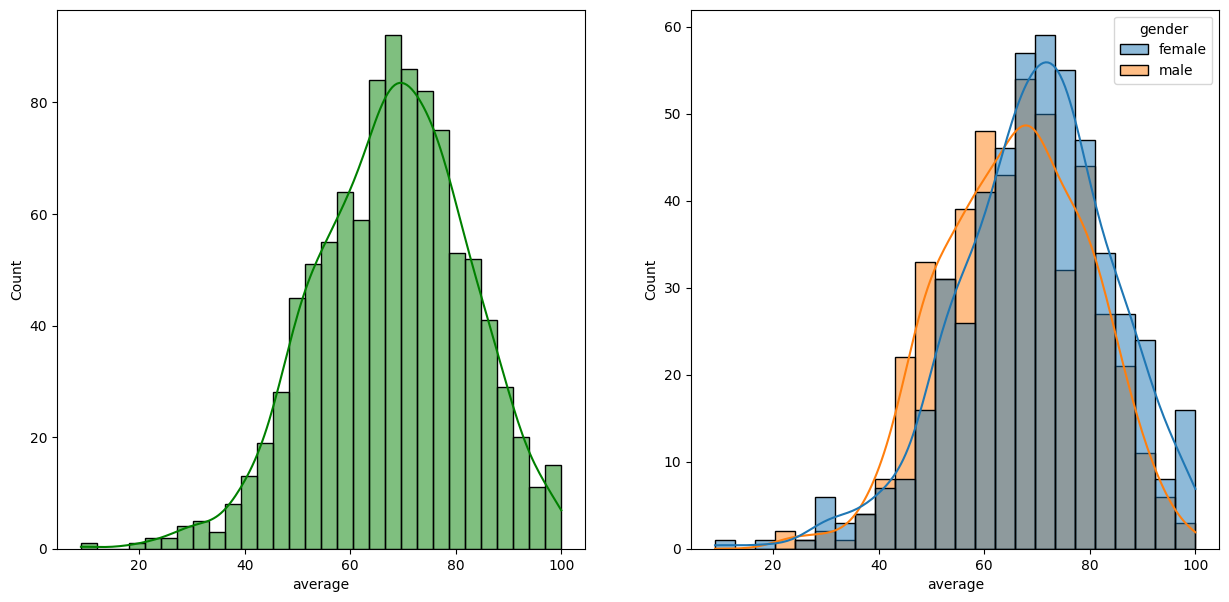

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

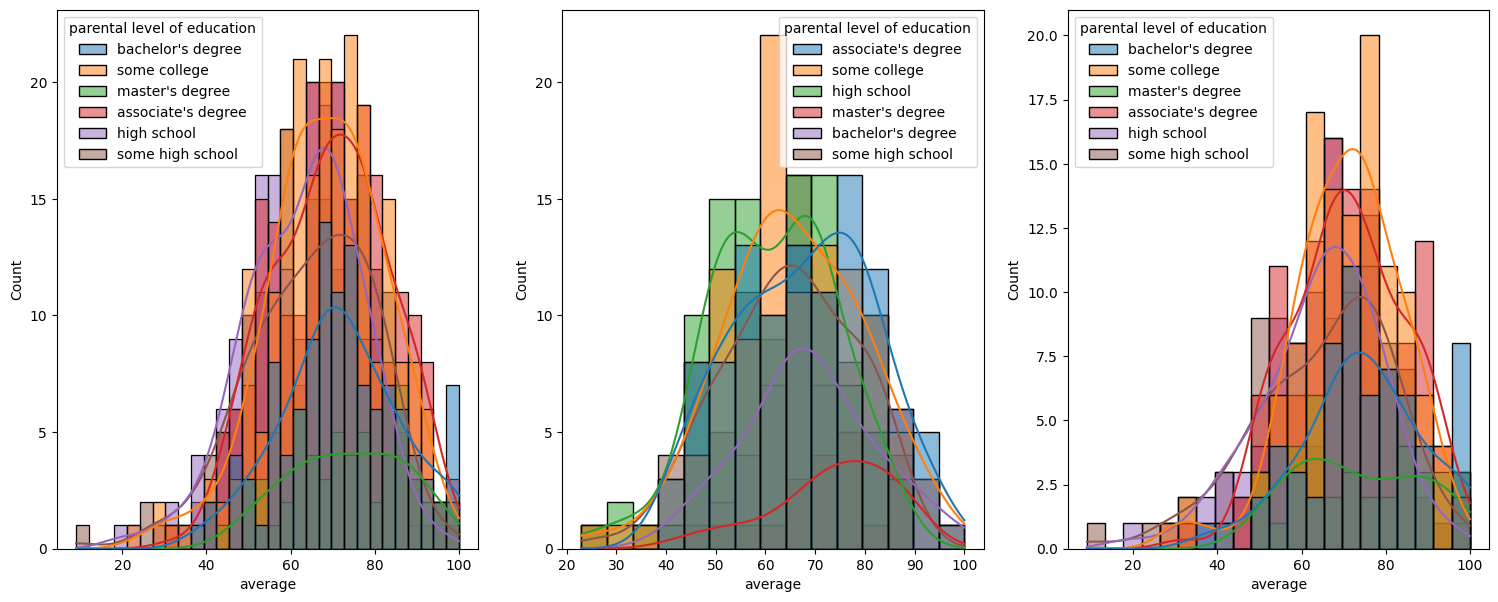

In [26]:
plt.subplots(1, 2, figsize=(25,7))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

<h3>Insights<h3>

<ul>
 <li>In general parent's education don't help student perform well in exam</li>
</ul>

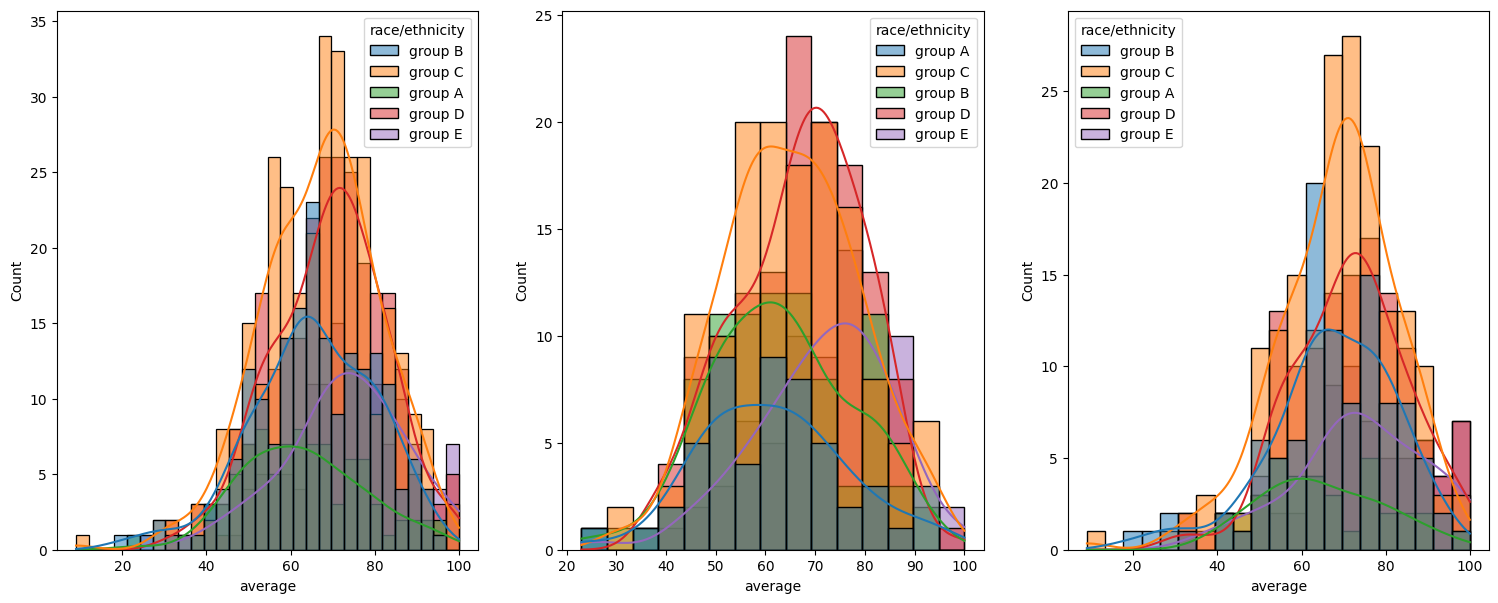

In [28]:
plt.subplots(1, 2, figsize=(25,7))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show()

<h3> Insights <h3>

<ul>
 <li> Group A and B are performing poorly in both genders </li>
 <li> most high scoring students belong to Group C and D
</ul>

<h3>4.3 Multivariate analysis using pieplot <h3>

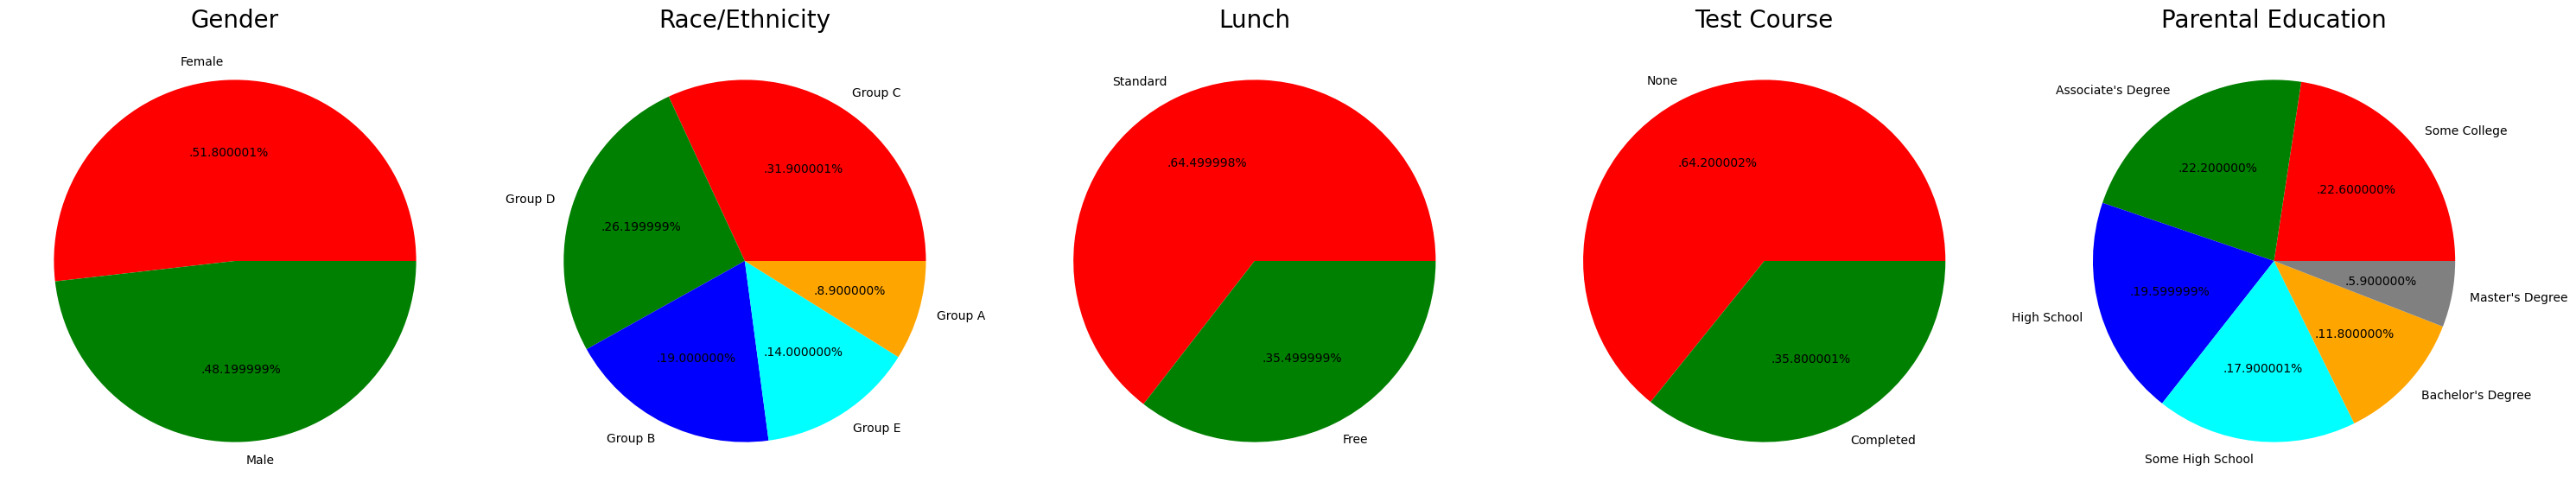

In [39]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [41]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


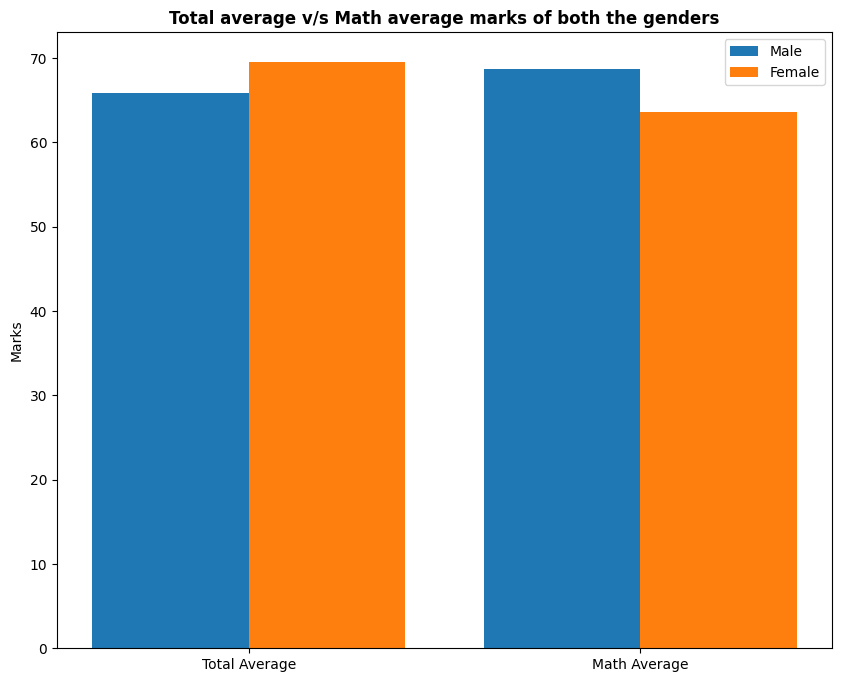

In [42]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()